In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("Missing_Data.csv")

In [3]:
df

,area,bedrooms,parking,airconditioning,price
0,7420.0,NaN,2.0,yes,13300000
1,8960.0,NaN,3.0,yes,12250000
2,9960.0,NaN,2.0,no,12250000
3,7500.0,NaN,3.0,yes,12215000
4,7420.0,NaN,2.0,yes,11410000
...,...,...,...,...,...
540,3000.0,2.0,2.0,no,1820000
541,2400.0,3.0,0.0,no,1767150
542,3620.0,2.0,0.0,no,1750000
543,2910.0,3.0,0.0,no,1750000


In [4]:
df.drop('airconditioning', axis = 1, inplace = True)
df.head()


,area,bedrooms,parking,price
0,7420.0,NaN,2.0,13300000
1,8960.0,NaN,3.0,12250000
2,9960.0,NaN,2.0,12250000
3,7500.0,NaN,3.0,12215000
4,7420.0,NaN,2.0,11410000


In [5]:
dff = df.copy()

In [6]:
df.head()

,area,bedrooms,parking,price
0,7420.0,NaN,2.0,13300000
1,8960.0,NaN,3.0,12250000
2,9960.0,NaN,2.0,12250000
3,7500.0,NaN,3.0,12215000
4,7420.0,NaN,2.0,11410000


In [7]:
df.isnull().sum()

area         4
bedrooms    19
parking     30
price        0
dtype: int64

In [8]:
df.isnull().mean()*100

area        0.733945
bedrooms    3.486239
parking     5.504587
price       0.000000
dtype: float64

In [9]:
## To fetch the colunms with the particular criteria.
l = [col for col in df.columns if df[col].isnull().mean() <0.05 and df[col].isnull().mean()>0]
l

['area', 'bedrooms']

In [10]:
df.dropna(subset = l[0], inplace = True)

In [11]:
df['parking'].fillna(df['parking'].mean(), inplace = True)
df['bedrooms'].fillna(df['bedrooms'].mean(), inplace = True)

In [12]:
df

,area,bedrooms,parking,price
0,7420.0,2.936902,2.0,13300000
1,8960.0,2.936902,3.0,12250000
2,9960.0,2.936902,2.0,12250000
3,7500.0,2.936902,3.0,12215000
4,7420.0,2.936902,2.0,11410000
...,...,...,...,...
540,3000.0,2.000000,2.0,1820000
541,2400.0,3.000000,0.0,1767150
542,3620.0,2.000000,0.0,1750000
543,2910.0,3.000000,0.0,1750000


In [13]:
X = df.iloc[:, 0:3]
y = df.iloc[:, -1]

In [14]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 1)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("R2 Score", r2_score(y_test, y_pred))
residual = y_test - y_pred

MAE 1208945.2680042163
MSE 2708764207918.7896
R2 Score 0.3064242922699877


## SIMPLE IMPUTER

In [17]:
df = pd.read_csv("Missing_Data.csv")
df.drop('airconditioning', axis = 1, inplace = True)
df.head()
dff = df.copy()

Text(0.5, 1.0, 'Area')

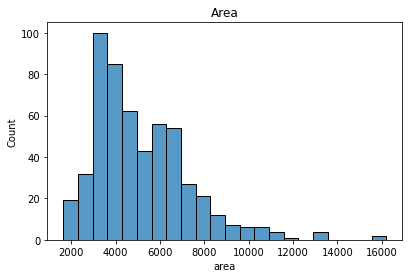

In [18]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.histplot(df['area'])
plt.title('Area')

In [19]:
imp1 = SimpleImputer(strategy = 'median')
imp2 = SimpleImputer(strategy = 'most_frequent')

In [20]:
tr = ColumnTransformer([
    ('Median', imp1, ['area']),
    ('Mode1', imp2, ['bedrooms']),
    ('Mode2', imp2, ['parking'])],
    remainder = 'passthrough')

In [21]:
X = df.iloc[:, 0:3]
y = df.iloc[:, -1]

In [22]:
tr.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('Median', SimpleImputer(strategy='median'),
                                 ['area']),
                                ('Mode1',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['bedrooms']),
                                ('Mode2',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['parking'])])

In [23]:
X = tr.fit_transform(X)


In [24]:
X

array([[7.42e+03, 3.00e+00, 2.00e+00],
       [8.96e+03, 3.00e+00, 3.00e+00],
       [9.96e+03, 3.00e+00, 2.00e+00],
       ...,
       [3.62e+03, 2.00e+00, 0.00e+00],
       [2.91e+03, 3.00e+00, 0.00e+00],
       [3.85e+03, 3.00e+00, 0.00e+00]])

In [25]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 1)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("R2 Score", r2_score(y_test, y_pred))
residual = y_test - y_pred

MAE 1177516.9639840694
MSE 2677129316536.3584
R2 Score 0.342299150103331


## Missing Indicator

In [28]:
df = pd.read_csv("Missing_Data.csv")
df.drop('airconditioning', axis = 1, inplace = True)
df.head()
dff = df.copy()

In [29]:
X = df.iloc[:, 0:3]
y = df.iloc[:, -1]

In [30]:
X

,area,bedrooms,parking
0,7420.0,NaN,2.0
1,8960.0,NaN,3.0
2,9960.0,NaN,2.0
3,7500.0,NaN,3.0
4,7420.0,NaN,2.0
...,...,...,...
540,3000.0,2.0,2.0
541,2400.0,3.0,0.0
542,3620.0,2.0,0.0
543,2910.0,3.0,0.0


In [31]:
imp = SimpleImputer(add_indicator = True)
imp.fit(X)
X = imp.transform(X)
X = pd.DataFrame(X)
X

,0,1,2,3,4,5
0,7420.0,2.939163,2.0,0.0,1.0,0.0
1,8960.0,2.939163,3.0,0.0,1.0,0.0
2,9960.0,2.939163,2.0,0.0,1.0,0.0
3,7500.0,2.939163,3.0,0.0,1.0,0.0
4,7420.0,2.939163,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...
540,3000.0,2.000000,2.0,0.0,0.0,0.0
541,2400.0,3.000000,0.0,0.0,0.0,0.0
542,3620.0,2.000000,0.0,0.0,0.0,0.0
543,2910.0,3.000000,0.0,0.0,0.0,0.0


In [32]:
X = X.iloc[:,3:6]
X

,3,4,5
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
540,0.0,0.0,0.0
541,0.0,0.0,0.0
542,0.0,0.0,0.0
543,0.0,0.0,0.0


In [33]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 1)

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("R2 Score", r2_score(y_test, y_pred))
residual = y_test - y_pred

MAE 1219090.9435379086
MSE 2212764975306.7837
R2 Score 0.45638135748938946
